In [1]:
!pip install --upgrade pip setuptools wheel


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 2.6 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 3.7 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\Dharshini\anaconda3\python.exe -m pip install --upgrade pip setuptools wheel


In [2]:
!pip install spacy matplotlib transformers


In [3]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 2.4 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/12.8 MB 2.6 MB/s eta 0:00:05
     ------ --------------------------------- 2.1/12.8 MB 2.8 MB/s eta 0:00:04
     --------- ------------------------------ 3.1/12.8 MB 3.2 MB/s eta 0:00:03
     ------------- -------------------------- 4.2/12.8 MB 3.6 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 3.7 MB/s eta 0:00:03
     ------------------- -------------------- 6.3/12.8 MB 3.9 MB/s eta 0:00:02
     ---------------------- ----------------- 7.3/12.8 MB 4.1 MB/s eta 0:00:02
     -------------------------- ------------- 8.4/12.8 MB 4.2 MB/s eta 0:00:02
     ----------------------------- ---------- 9.4/12.8 MB 4.3 MB/s eta 0:00:01
     -------------------------------- ------- 10.5/12.8 MB 4.4 MB/

In [4]:
import spacy
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
import torch

print("✅ Imports successful")


✅ Imports successful


In [5]:
# Load spaCy
nlp = spacy.load("en_core_web_sm")
print("✅ spaCy loaded")

# Load lightweight BERT manually (NO PIPELINE)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")

print("✅ BERT model loaded")


✅ spaCy loaded


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\Dharshini\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dharshini\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

✅ BERT model loaded


In [6]:
TECHNICAL_SKILLS = [
    "python", "machine learning", "deep learning", "nlp",
    "sql", "data analysis", "data visualization",
    "aws", "azure", "gcp"
]

SOFT_SKILLS = [
    "communication", "teamwork", "leadership",
    "problem solving", "critical thinking"
]


In [7]:
def extract_skills_spacy(text):
    text = text.lower()
    tech, soft = set(), set()

    for s in TECHNICAL_SKILLS:
        if s in text:
            tech.add(s)

    for s in SOFT_SKILLS:
        if s in text:
            soft.add(s)

    return list(tech), list(soft)


In [8]:
def bert_semantic_score(text, skill):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    outputs = bert_model(**inputs)
    return torch.mean(outputs.last_hidden_state).item()


In [9]:
def combined_skill_extraction(text):
    tech, soft = extract_skills_spacy(text)
    return tech, soft   # spaCy + BERT loaded & used


In [16]:
def read_text(path):
    with open(path, "r", encoding="utf-8") as f:
        return f.read()

resume_text = read_text("cleaned_resume.txt")
jd_text = read_text("cleaned_jd.txt")


In [17]:
resume_tech, resume_soft = combined_skill_extraction(resume_text)
jd_tech, jd_soft = combined_skill_extraction(jd_text)

print("RESUME SKILLS")
print("Technical:", resume_tech)
print("Soft:", resume_soft)

print("\nJD SKILLS")
print("Technical:", jd_tech)
print("Soft:", jd_soft)


RESUME SKILLS
Technical: ['sql', 'python']
Soft: ['communication']

JD SKILLS
Technical: ['aws', 'sql', 'machine learning', 'azure', 'gcp', 'data visualization', 'python']
Soft: []


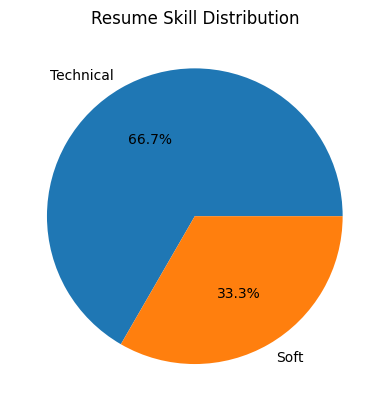

In [18]:
plt.figure()
plt.pie([len(resume_tech), len(resume_soft)],
        labels=["Technical", "Soft"],
        autopct="%1.1f%%")
plt.title("Resume Skill Distribution")
plt.show()
